<a href="https://colab.research.google.com/github/ranzan97/Machine-Learning/blob/main/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
url = 'https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv'
data= pd.read_csv(url, encoding='iso-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data[:10]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# Deleting the Unnamed 2, Unnamed 3, Unnamed 4 Columns and replacing ham with 0 and spam with 1

In [6]:

# List of unnamed columns to drop
unnamed_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Drop the unnamed columns
data = data.drop(columns=unnamed_columns)

# Verify the columns after dropping
print(data.columns)

# Display the first few rows of the cleaned DataFrame
print(data.head())


Index(['v1', 'v2'], dtype='object')
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

<ipython-input-7-41c8284050c3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
data.isnull().values.any()

False

In [10]:
data['v2'].nunique()

5169

In [11]:
data.drop_duplicates(subset=['v2'], inplace=True)
len(data)

5169

In [12]:
data.groupby('v1').size().reset_index(name='count') #number of ham and spam

,v1,count
0,0,4516
1,1,653


In [13]:
print(f'No spam = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'Spam = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

No spam = 87.367%
Spam = 12.633%


In [14]:
X_data = data['v2']
y_data = data['v1']
print('Total: {}'.format(len(X_data)))
print('Labelled: {}'.format(len(y_data)))

Total: 5169
Labelled: 5169


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:10])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407], [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3], [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112], [171, 16, 3, 522, 1155, 12, 104, 449], [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180], [709, 223, 115, 1, 390, 2, 89, 3, 25, 2, 89, 10, 13, 1812, 166, 14, 316, 130, 10, 1313, 24, 63, 3489, 10, 23, 157, 12, 3490]]


In [17]:
word_to_index = tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [18]:
threshold = 2
total_cnt = len(word_to_index) # Number of words
rare_cnt = 0 # Count of words with frequency less than threshold
total_freq = 0 # Total sum of word frequencies in the training data
rare_freq = 0 # Total sum of frequencies for words appearing less than threshold

# Receive word and frequency pairs as key and value
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # If the word's frequency is less than the threshold
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Number of rare words with frequency %s or less: %s'%(threshold - 1, rare_cnt))
print("Percentage of rare words in the vocabulary:", (rare_cnt / total_cnt)*100)
print("Percentage of rare word occurrences in total frequency:", (rare_freq / total_freq)*100)


Number of rare words with frequency 1 or less: 4337
Percentage of rare words in the vocabulary: 55.45326684567191
Percentage of rare word occurrences in total frequency: 6.65745644331875


In [19]:
vocab_size = len(word_to_index) + 1
print('Size of vocabulary: {}'.format((vocab_size)))


Size of vocabulary: 7822


Maximum length of emails: 189
Average length of emails: 15.754534


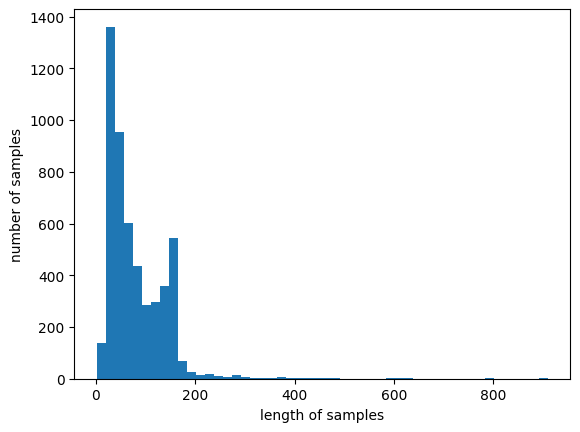

In [20]:
print('Maximum length of emails: %d' % max(len(sample) for sample in X_train_encoded))
print('Average length of emails: %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [21]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("Shape of training data:", X_train_padded.shape)


Shape of training data: (4135, 189)


In [22]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)


Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - acc: 0.8780 - loss: 0.4047 - val_acc: 0.9698 - val_loss: 0.1541
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - acc: 0.9647 - loss: 0.1290 - val_acc: 0.9661 - val_loss: 0.1142
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - acc: 0.9831 - loss: 0.0692 - val_acc: 0.9782 - val_loss: 0.0759
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - acc: 0.9878 - loss: 0.0388 - val_acc: 0.9807 - val_loss: 0.0620


In [23]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n Test accuracy: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9852 - loss: 0.0621

 Test accuracy: 0.9807


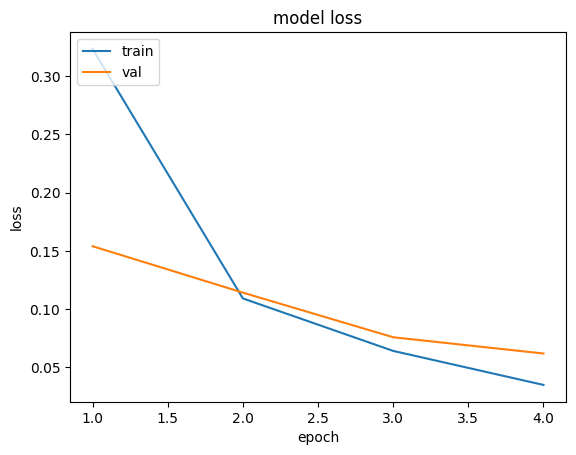

In [24]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
